中债指数ak接口
https://akshare.akfamily.xyz/data/bond/bond.html#id45


In [11]:
import akshare as ak
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib as ta
from matplotlib.font_manager import FontProperties
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
# 添加字体
# matplotlib.rcParams['axes.unicode_minus']=False # 如果不加入下面这一句，会导致负号无法显示
# plt.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
# 下载数据
#df = ak.bond_new_composite_index_cbond(indicator="财富", period="总值")
#df.to_csv('bond_index.csv')
#print(df)

df_bond_index = pd.read_csv('bond_index.csv')
df_bond_index['date'] = pd.to_datetime(df_bond_index.date, format='%Y-%m-%d')

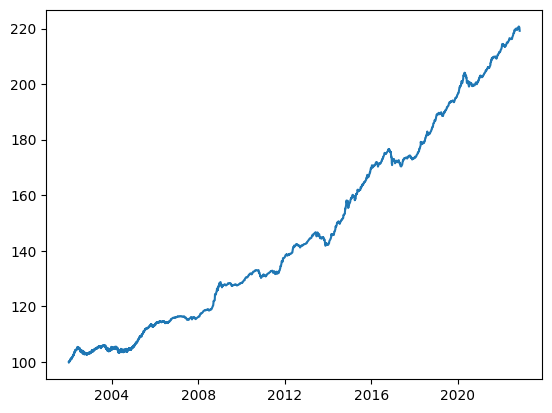

In [3]:
plt.plot(df_bond_index.date,df_bond_index.value)

国债收益率
https://akshare.akfamily.xyz/data/bond/bond.html#id37

In [73]:

# bond_rate_df = ak.bond_zh_us_rate()
# bond_rate_df.to_csv('bond_rate.csv')
# print(bond_rate_df)

df_bond_rate = pd.read_csv('bond_rate.csv')
df_bond_rate['日期'] = pd.to_datetime(df_bond_rate['日期'], format='%Y-%m-%d')
#df_bond_rate[~df_bond_rate['中国国债收益率10年'].isna()].count()

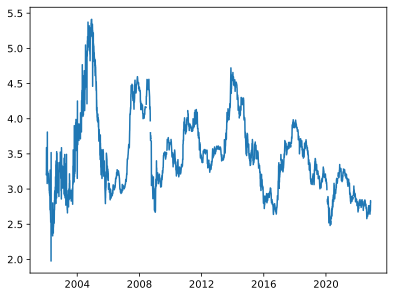

In [76]:
%matplotlib inline
plt.plot(df_bond_rate['日期'],df_bond_rate['中国国债收益率10年'])

In [13]:
# 上证指数:https://www.akshare.xyz/data/index/index.html#id1
# df_stock_index = ak.stock_zh_index_daily(symbol="sh000001")
# df_stock_index.to_csv('sh_stock_index.csv')
# print(df_stock_index)
df_stock_index = pd.read_csv('sh_stock_index.csv')
df_stock_index['date'] = pd.to_datetime(df_stock_index['date'], format='%Y-%m-%d')
print(df_stock_index)

      Unnamed: 0       date      open      high       low     close  \
0              0 1990-12-19    96.050    99.980    95.790    99.980   
1              1 1990-12-20   104.300   104.390    99.980   104.390   
2              2 1990-12-21   109.070   109.130   103.730   109.130   
3              3 1990-12-24   113.570   114.550   109.130   114.550   
4              4 1990-12-25   120.090   120.250   114.550   120.250   
...          ...        ...       ...       ...       ...       ...   
7792        7792 2022-11-11  3099.650  3117.742  3070.301  3087.293   
7793        7793 2022-11-14  3100.867  3121.406  3075.215  3083.401   
7794        7794 2022-11-15  3081.135  3135.590  3074.498  3134.078   
7795        7795 2022-11-16  3133.650  3145.753  3115.345  3119.980   
7796        7796 2022-11-17  3110.965  3115.435  3087.174  3115.435   

           volume  
0          126000  
1           19700  
2            2800  
3            3200  
4            1500  
...           ...  
7792  4

合成到一起

5221 8320 7797 4057


Text(0, 0.5, 'stock index')

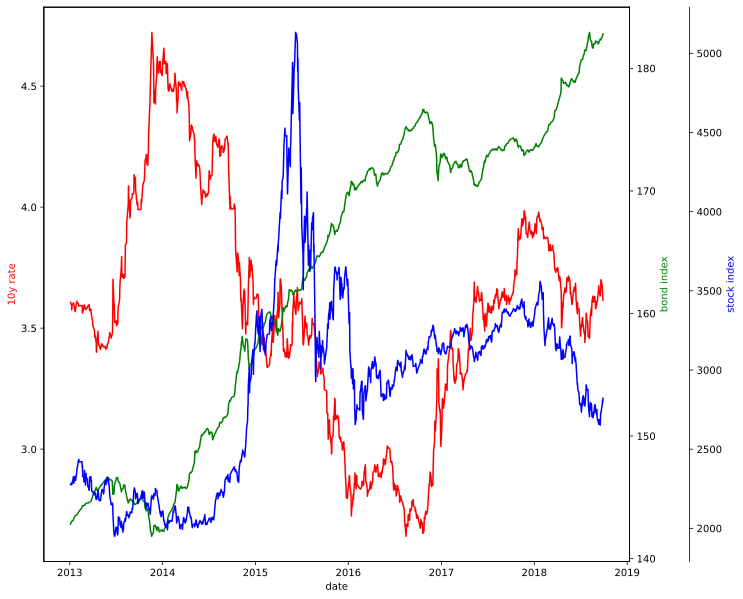

In [23]:
df1 = df_bond_index[['date','value']]
df2 = df_bond_rate[['日期','中国国债收益率10年']]
df3 = df_stock_index[['date','close']]
df = pd.merge(df1,df2,how='inner',left_on='date',right_on='日期')
df = pd.merge(df,df3,how='inner',left_on='date',right_on='date')
print(len(df1),len(df2),len(df3), len(df))

df = df[(df.date>'2013-01-01') & (df.date<'2018-10-01')]

x = df.date
y1 = df['value']
y2 = df['中国国债收益率10年']
y3 = df['close']


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


fig = plt.figure(figsize=(10.5,10))#,dpi=(100))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax3 = ax1.twinx()
# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))

ax1.plot(x,y2,'r-')
ax2.plot(x,y1,'g-')
ax3.plot(x,y3,'b-')

plt.xticks(rotation=120)

ax1.set_xlabel('date')    #设置x轴标题
ax2.set_ylabel('bond index',color = 'g')   #设置Y1轴标题
ax1.set_ylabel('10y rate',color = 'r')   #设置Y2轴标题
ax3.set_ylabel('stock index',color = 'b')   #设置Y3轴标题

# fig.tight_layout()
# plt.savefig("result.png") #, dpi=500, bbox_inches='tight')

考察相关性：
在统计学中，皮尔逊积矩相关系数（英语：Pearson product-moment correlation coefficient，又称作 PPMCC或PCCs, 用r表示）用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。
通常情况下通过以下相关系数取值范围判断变量的相关强度：
    0.8-1.0     极强相关
    0.6-0.8     强相关
    0.4-0.6     中等程度相关
    0.2-0.4     弱相关
    0.0-0.2     极弱相关或无相关
这个相关系数也称作“皮尔森相关系数r”。
(1)皮尔逊系数的定义：
两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商

In [58]:
print(len(df))
df.isna().count()

4234


date          4234
value         4234
日期            4234
中国国债收益率10年    4234
dtype: int64

In [62]:
df[['value','中国国债收益率10年']].corr()

,value,中国国债收益率10年
value,1.000000,-0.403004
中国国债收益率10年,-0.403004,1.000000
